In [151]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns',None)
from matplotlib import style
import warnings
warnings.filterwarnings("ignore")
import mplcyberpunk
style.use('cyberpunk')
import tweepy
import re
import sys
import geocoder
from textblob import TextBlob
%matplotlib inline

from jupyterthemes import jtplot
jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False)


In [152]:
#key preparation
consumer_key = "dTXuRJTUcNBhvB6mYEaPbXllS"
consumer_secret = "3zxof8B0CCVrYmCHOISPMTO7I2bM68jRiBZFhhiioTGylque61"
access_token = "1363725829335752705-bQPXXW63tBv1opfScm6iknI3Tk1uOb"
access_token_secret = "eo4xe57BTDO9klPDsiLZBqw6NHpL175yxGOOwvTENB25W"

#create handler outh
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)



In [153]:
indo_woeid = 23424846
results = api.trends_place(indo_woeid)
for trend in results[0]['trends'][:5]:
    print(trend['name'],trend['tweet_volume'])

Demokrat Bikin Gaduh None
RESPECT ZHANG YIXING 139049
Selamat Hari Musik Nasional None
#슈가생일ᄎᄏ 2766765
Young Lex 51861


In [154]:
search_words = "Senin"
date_since = "2021-03-08"
new_search = search_words + " -filter:retweets"

tweets = tweepy.Cursor(api.search,
        q=new_search,
        lang="id",
        tweet_mode='extended',
        since=date_since).items(50)

In [155]:
items = []
for tweet in tweets:
    items.append (' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet.full_text).split()))
df = pd.DataFrame(data=items, columns=['tweet'])

In [156]:
df.head()

,tweet
0,Senin 8 Maret 2021 personel Lab BRPSDI yang di...
1,Harapkan Dukungan Pelaksanaan Tugas Fungsi Div...
2,Mulai 8 Maret 2021 TV3 Malaysia mengubah jadwa...
3,Ga suka hari Senin
4,Senin aja ah


In [157]:

# Load Training set into array
file_negatif = open('kata_negatif.txt','r')
file_positif = open('kata_positif.txt','r')
pos_kata = file_positif.readlines()
neg_kata = file_negatif.readlines()
# pos_kata


In [158]:
hasil = []

list_anti = ['tidak','lawan','anti', 'belum', 'belom', 'tdk', 'jangan', 'gak', 'enggak', 'bukan', 'sulit', 'tak', 'sblm']
sentimen = {'positif':0,'negatif':0,'netral':0}
for item in items:
    print(item.strip())
    tweets = item.strip().split() # tokenization
    print(tweets) 
    count_p = 0
    count_n = 0
    for tweet in tweets:
        for kata_pos in pos_kata:
            if kata_pos.strip().lower() == tweet.lower():
                if items[items.index(item)-1] in list_anti:
                    print(items[items.index(item)-1],kata_pos, ['negatif'])
                    count_n +=1
                else:
                    print(kata_pos, ['positif'])
                    count_p +=1
                          
        for kata_neg in neg_kata:
            if kata_neg.strip().lower() == tweet.lower():
                if items[items.index(item)-1] in list_anti:
                    print(items[items.index(item)-1],kata_neg, ['positif'])
                    count_p +=1
                else:
                    print(kata_neg, ['negatif'])
                    count_n +=1

    print("positif :"+ str(count_p))
    print("negatif :"+ str(count_n))
    hasil.append(count_p - count_n)
    if count_p>count_n:
        sentimen['positif'] +=1
    elif count_n>count_p:
        sentimen['negatif'] +=1
    else:
        sentimen['netral'] +=1
    print('==============================================')

Senin 8 Maret 2021 personel Lab BRPSDI yang diwakili oleh Manajer Teknis Deputi Manajer Teknis dan para Penyelia berkoordinasi untuk menindaklanjuti temuan survailance II oleh KAN yang sdh dilaksanakan di tanggal 26 Februari 2021
['Senin', '8', 'Maret', '2021', 'personel', 'Lab', 'BRPSDI', 'yang', 'diwakili', 'oleh', 'Manajer', 'Teknis', 'Deputi', 'Manajer', 'Teknis', 'dan', 'para', 'Penyelia', 'berkoordinasi', 'untuk', 'menindaklanjuti', 'temuan', 'survailance', 'II', 'oleh', 'KAN', 'yang', 'sdh', 'dilaksanakan', 'di', 'tanggal', '26', 'Februari', '2021']
berkoordinasi
 ['positif']
menindaklanjuti
 ['positif']
positif :2
negatif :0
Harapkan Dukungan Pelaksanaan Tugas Fungsi Divisi Keimigrasian Kanwil Kalsel Lakukan Audiensi ke Ditjen Imigrasi dan Ditjen KI pada Senin 8 Maret 2021
['Harapkan', 'Dukungan', 'Pelaksanaan', 'Tugas', 'Fungsi', 'Divisi', 'Keimigrasian', 'Kanwil', 'Kalsel', 'Lakukan', 'Audiensi', 'ke', 'Ditjen', 'Imigrasi', 'dan', 'Ditjen', 'KI', 'pada', 'Senin', '8', 'Maret'

hanya
 ['negatif']
kerja
 ['positif']
kasih
 ['positif']
positif :3
negatif :1
senin selasa sangat amat membentuk mental sekali banget
['senin', 'selasa', 'sangat', 'amat', 'membentuk', 'mental', 'sekali', 'banget']
positif :0
negatif :0
Indonesia kembali menerima pengiriman vaksin C0vid 19 Pada Senin 8 Maret 2021 sebanyak 1 1 juta dosis vaksin yg diperoleh melalui skema kerja sama multilateral tiba di Bandara Internasional Soekarno Hatta Tangerang sekira pukul 17 45 WIB
['Indonesia', 'kembali', 'menerima', 'pengiriman', 'vaksin', 'C0vid', '19', 'Pada', 'Senin', '8', 'Maret', '2021', 'sebanyak', '1', '1', 'juta', 'dosis', 'vaksin', 'yg', 'diperoleh', 'melalui', 'skema', 'kerja', 'sama', 'multilateral', 'tiba', 'di', 'Bandara', 'Internasional', 'Soekarno', 'Hatta', 'Tangerang', 'sekira', 'pukul', '17', '45', 'WIB']
menerima
 ['positif']
kerja
 ['positif']
positif :2
negatif :0
YELLOW SQUAD Kegiatan Respon Genangan di Jl Jenderal Sudirman oleh PJLP Lapangan Kecamatan Setiabudi Senin 8 Ma

['YELLOW', 'SQUAD', 'Kegiatan', 'Perbaikan', 'Jalan', 'amp', 'Trotoar', 'oleh', 'PJLP', 'Lapangan', 'Kecamatan', 'Pasar', 'Minggu', 'Senin', '8', 'Maret', '2021', 'BeritaJakarta', 'InfoJakarta', 'PasukanKuning']
perbaikan
 ['positif']
positif :1
negatif :0
Senin 8 3 telah dilaksanakan penyerahan Mahasiswa Magang dari PPI Madiun kepada Kepala BTP Jabar yang berlangsung di Kantor BTP Jabar Jln Gedebage No 68 Bandung perkeretaapian
['Senin', '8', '3', 'telah', 'dilaksanakan', 'penyerahan', 'Mahasiswa', 'Magang', 'dari', 'PPI', 'Madiun', 'kepada', 'Kepala', 'BTP', 'Jabar', 'yang', 'berlangsung', 'di', 'Kantor', 'BTP', 'Jabar', 'Jln', 'Gedebage', 'No', '68', 'Bandung', 'perkeretaapian']
positif :0
negatif :0
Pernah suatu hari beliau menyampaikan sesuatu Moel kalau kamu tidak bisa memberi jangan pernah mengambil Ini terngiang terus hingga sekarang ucap Moeldoko dikutip Senin 8 3 2021
['Pernah', 'suatu', 'hari', 'beliau', 'menyampaikan', 'sesuatu', 'Moel', 'kalau', 'kamu', 'tidak', 'bisa', 'm

In [159]:
df['sentimen value'] = hasil

In [160]:
sentimen

{'positif': 24, 'negatif': 6, 'netral': 20}

In [161]:
import mplcyberpunk
style.use('cyberpunk')

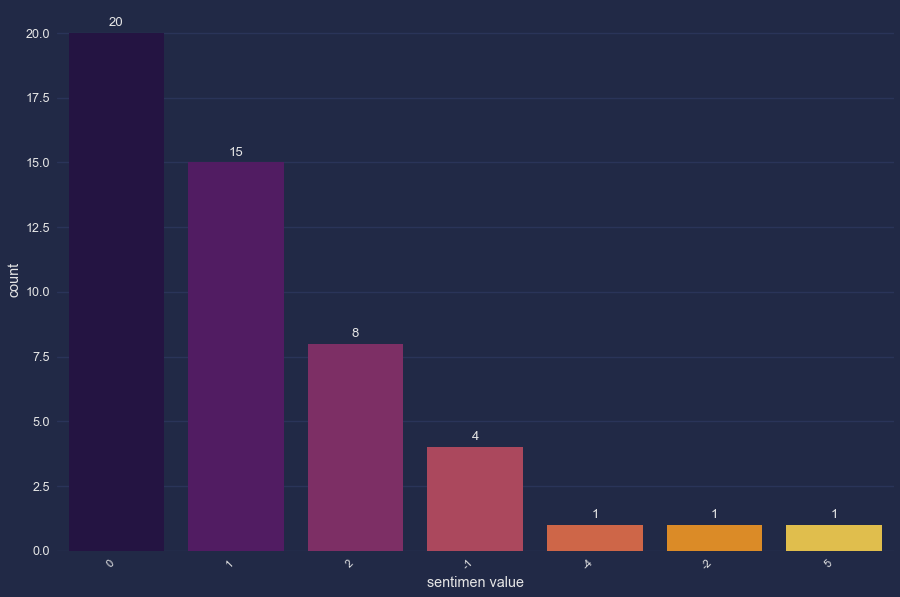

In [162]:
plt.figure(figsize=(15,10))
a= sns.countplot(data=df,x='sentimen value',palette='inferno',order = df['sentimen value'].value_counts().index)
for p in a.patches:
    a.annotate(str(int(p.get_height())), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points') 

plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='small' )
plt.show()

dari grafik diatas, terlihat bahwa kata netral dan positif jauh lebih banyak dibandingkan kata negatif. untuk menilai apakah isi twitter pada key search kita yaitu 8 Maret 2021 mempunyai sentimen positif atau negatif, kita lihat pada grafik bar berikutnya

In [163]:
import sidetable as stb

<BarContainer object of 3 artists>

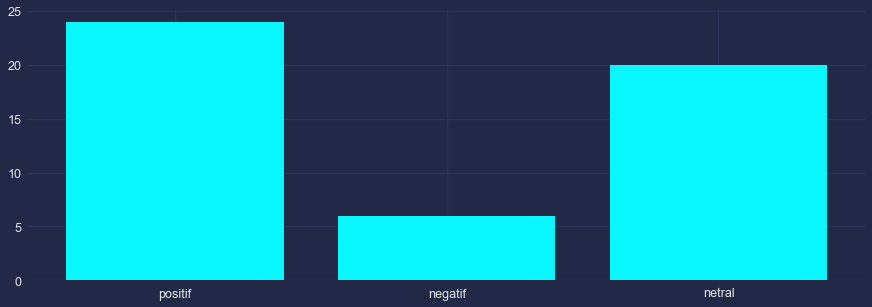

In [165]:
plt.figure(figsize=(15,5))
plt.bar(sentimen.keys(),sentimen.values(),align='center')

# plt.gca().set_xticks(sentimen.keys())

Grafik bar ini menunjukkan bahwa ternyata sentimen twitter pada tanggal 8 maret 2021 dengan kata kunci Senin mempunyai sentimen yang positif. artinya isi twit user pada hari senin lebih banyak menunjukkan hal yang positif dibandingkan negatifnya. 